## Découverte du fichier 'Country'

In [3]:
import pandas as pd
country = pd.read_csv('EdStatsCountry.csv')
country.shape

(241, 32)

In [4]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

Quels sont les pays qui n'ont pas de 'currency unit' ??

In [5]:
country.loc[country['Currency Unit'].isnull(), ['Country Code','Short Name']]

,Country Code,Short Name
5,ARB,Arab World
57,EAP,East Asia & Pacific (developing only)
58,EAS,East Asia & Pacific (all income levels)
59,ECA,Europe & Central Asia (developing only)
60,ECS,Europe & Central Asia (all income levels)
63,EMU,Euro area
68,EUU,European Union
89,HIC,High income
92,HPC,Heavily indebted poor countries (HIPC)
116,LAC,Latin America & Caribbean (developing only)


A part le micro-état de l'ile de Nauru, tous ces 'pays' sont des groupements de pays.
Maintenant, quels sont ceux qui n'ont pas de code à deux lettres ?

In [6]:
country.loc[country['2-alpha code'].isna(), :]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
35,CHI,Channel Islands,Channel Islands,Channel Islands,NaN,Pound sterling,NaN,Europe & Central Asia,High income: nonOECD,JG,...,NaN,Guernsey: 2009; Jersey: 2011.,NaN,NaN,Yes. Vital registration for Guernsey and Jersey.,NaN,NaN,NaN,NaN,NaN
158,NAM,Namibia,Namibia,Republic of Namibia,NaN,Namibian dollar,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,NaN,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2009/10",NaN,2014,NaN,2012.0,2002,NaN
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN


En consultant https://www.iban.com/country-codes, je vois que seulement 'NAM', parmis ces trois, a un code 2 lettres : NA
Je corrige donc le DF:

In [7]:
country.loc[country['Country Code'] == 'NAM', ['2-alpha code']] = 'NA'

Je sépare 'Country' en deux DF: un qui contient véritablement les pays, et un autre qui va contenir les régions (groupements de pays en fait) :

In [8]:
region = country.loc[(country['Currency Unit'].isna()) & ~(country['Country Code']=='NRU')]
country = country.loc[~(country['Currency Unit'].isna()) | (country['Country Code']=='NRU')]

In [9]:
region.isnull().sum()

Country Code                                          0
Short Name                                            0
Table Name                                            0
Long Name                                             0
2-alpha code                                          0
Currency Unit                                        25
Special Notes                                         0
Region                                               25
Income Group                                         25
WB-2 code                                             0
National accounts base year                          25
National accounts reference year                     25
SNA price valuation                                  25
Lending category                                     25
Other groups                                         25
System of National Accounts                          25
Alternative conversion factor                        25
PPP survey year                                 

Je ne garde que les colonnes renseignées de 'region' :

In [10]:
region = region[['Country Code','Short Name','Table Name','Long Name','2-alpha code','Special Notes','WB-2 code']]

quels sont les pays qui n'ont pas l'information 'region' ?

In [11]:
country.loc[country['Region'].isna()]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
78,GIB,Gibraltar,Gibraltar,Gibraltar,GI,Gibraltar pound,NaN,NaN,NaN,GI,...,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,NRU,Nauru,Nauru,Nauru,NR,NaN,NaN,NaN,NaN,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Et ceux qui n'ont pas de 'WB-2 code' ?

In [12]:
country.loc[country['WB-2 code'].isna()]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
158,NAM,Namibia,Namibia,Republic of Namibia,NA,Namibian dollar,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,NaN,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2009/10",NaN,2014,NaN,2012.0,2002,NaN


In [13]:
# On complete de nouveau l'info. pour la Namibie :
country.loc[country['Country Code'] == 'NAM', ['WB-2 code']] = 'NA'

Quels sont les pays pour lesquels le code 2 lettres est different du 'WB-2 code' ?

In [14]:
country.loc[~(country['2-alpha code']==country['WB-2 code'])]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
35,CHI,Channel Islands,Channel Islands,Channel Islands,NaN,Pound sterling,NaN,Europe & Central Asia,High income: nonOECD,JG,...,NaN,Guernsey: 2009; Jersey: 2011.,NaN,NaN,Yes. Vital registration for Guernsey and Jersey.,NaN,NaN,NaN,NaN,NaN
40,COD,Dem. Rep. Congo,"Congo, Dem. Rep.",Democratic Republic of the Congo,CD,Congolese franc,"Based on INS (2000-09) and IMF (2010-13) data,...",Sub-Saharan Africa,Low income,ZR,...,General Data Dissemination System (GDDS),1984,"Demographic and Health Survey (DHS), 2013","1-2-3 survey (1-2-3), 2004/05",NaN,NaN,NaN,NaN,2005,NaN
181,PSE,West Bank and Gaza,West Bank and Gaza,West Bank and Gaza,PS,Israeli new shekel,NaN,Middle East & North Africa,Lower middle income,GZ,...,Special Data Dissemination Standard (SDDS),2007,"Multiple Indicator Cluster Survey (MICS), 2010","Integrated household survey (IHS), 2009",NaN,NaN,2010.0,NaN,2005,NaN
197,SRB,Serbia,Serbia,Republic of Serbia,RS,New Serbian dinar,Montenegro declared independence from Serbia a...,Europe & Central Asia,Upper middle income,YF,...,General Data Dissemination System (GDDS),2011,"Multiple Indicator Cluster Survey (MICS), 2010","Integrated household survey (IHS), 2010",Yes,2012,2010.0,NaN,2009,NaN
216,TLS,Timor-Leste,Timor-Leste,Democratic Republic of Timor-Leste,TL,U.S. dollar,"Based on official government statistics, natio...",East Asia & Pacific,Lower middle income,TP,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2009/10",Living Standards Measurement Study Survey (LSM...,NaN,2010. Population and Housing Census.,NaN,2005.0,2004,NaN
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN


Je supprime GIB et NRU vus ci-dessus, qui n'ont pas de code région, ni de code de devise pour le deuxième, et parce qu'ils sont tout petits, donc pas interessant en terme de clientèle potentielle.

In [15]:
country = country.drop(index=78, axis=0)
country = country.drop(index=166, axis=0)

<Axes: >

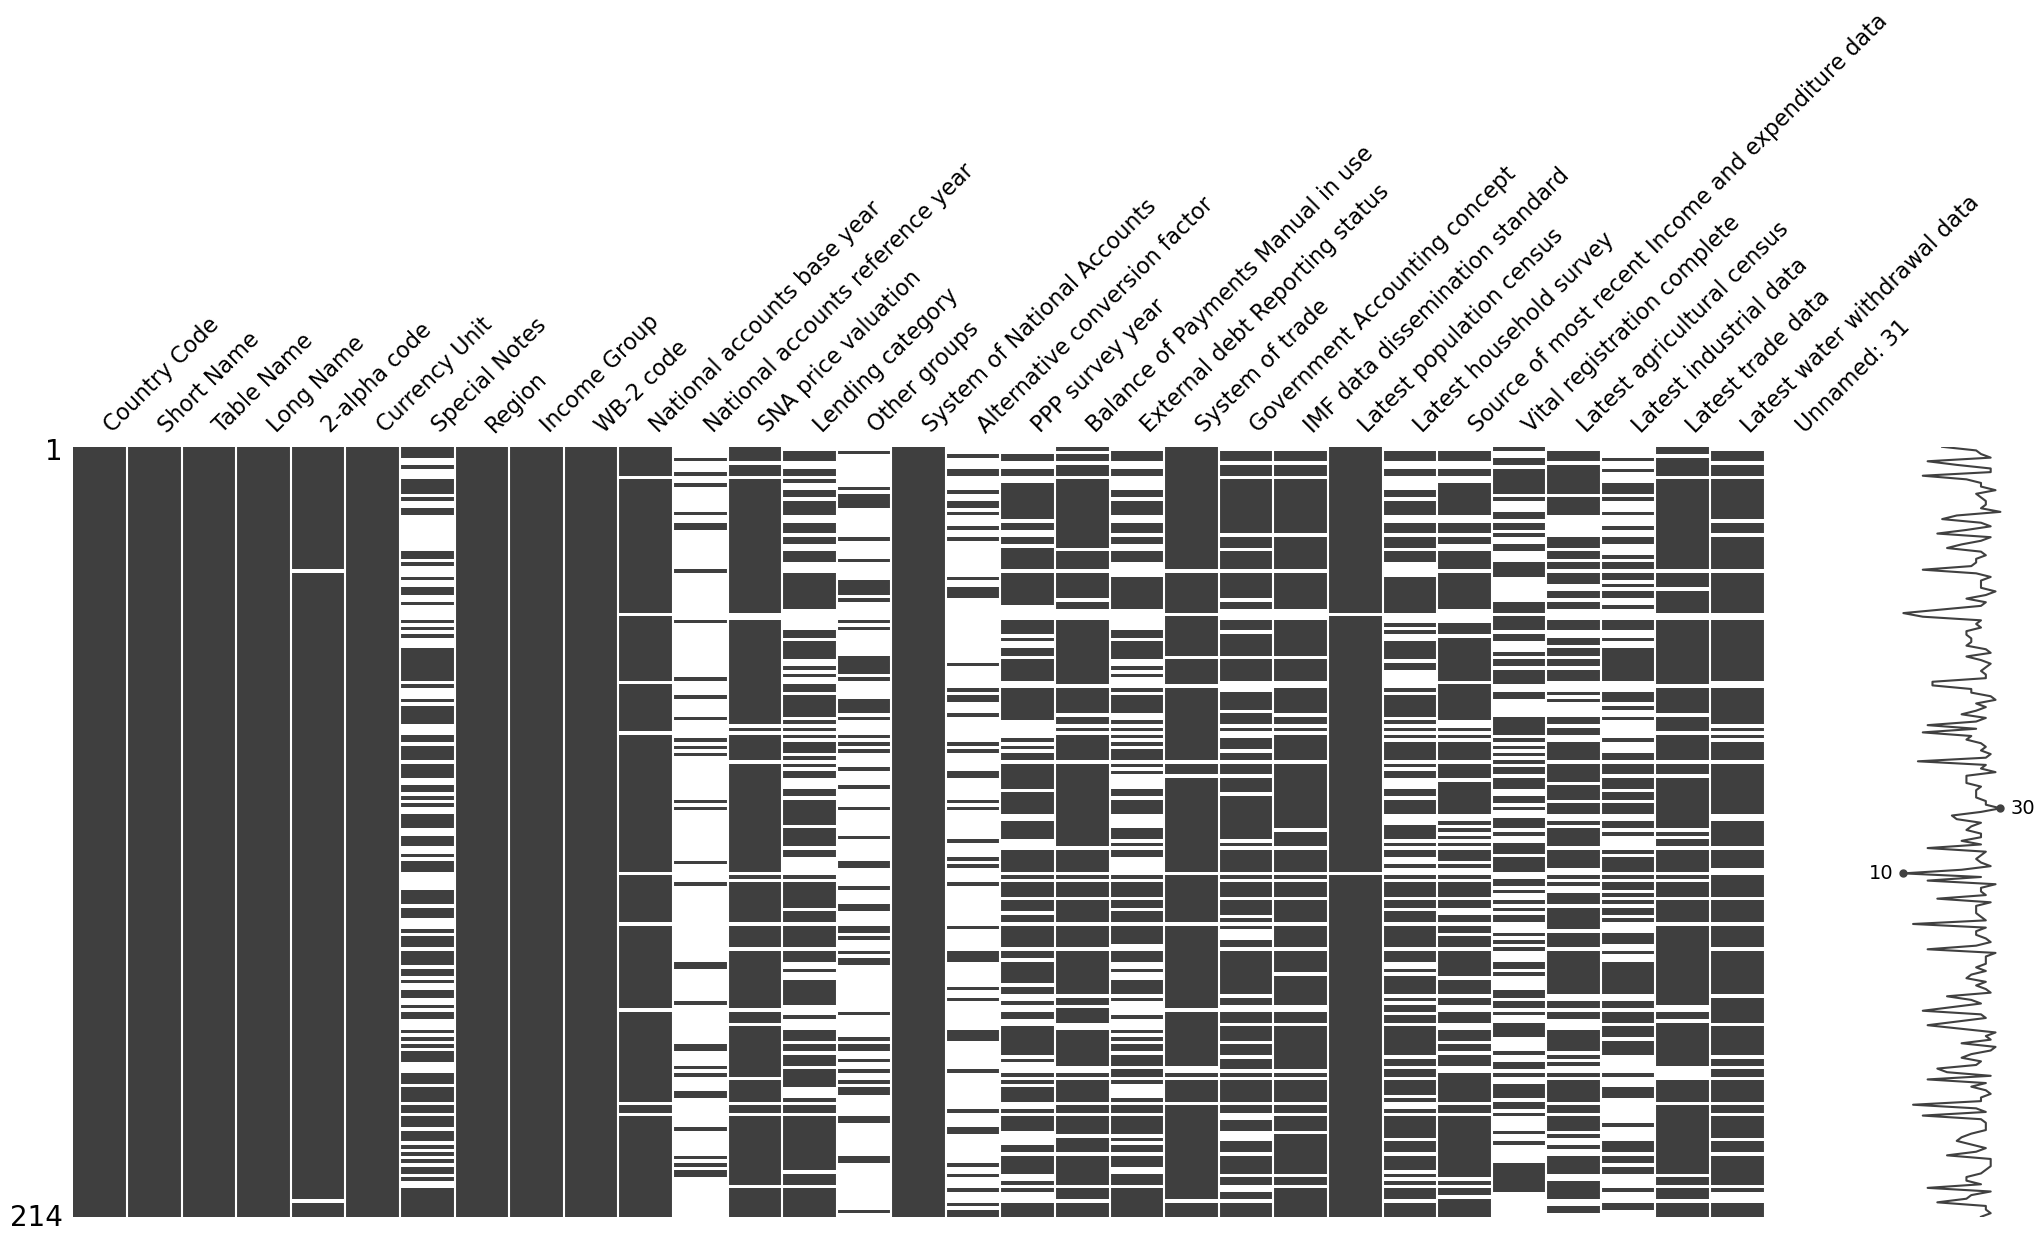

In [16]:
import missingno as msno
msno.matrix(country)

In [17]:
country.loc[country['Income Group'].isna()]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31


In [18]:
country.to_csv('EdStatsCountry.csv')

In [19]:
country['Region'].value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [20]:
region.to_csv('region.csv')

## Le fichier 'EdStatsCountry-Series.csv'

In [22]:
CS = pd.read_csv('EdStatsCountry-Series.csv')
CS.shape

(613, 4)

In [23]:
CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [24]:
CS.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [25]:
CS = CS.drop('Unnamed: 3', axis=1)  # suppression de la colonne inutile

In [26]:
CS.loc[CS[['CountryCode','SeriesCode','DESCRIPTION']].duplicated(keep=False), :]  # recherche de duplicatas

,CountryCode,SeriesCode,DESCRIPTION


In [27]:
CS.loc[CS[['CountryCode','SeriesCode']].duplicated(keep=False), :]

,CountryCode,SeriesCode,DESCRIPTION


Ces deux résultats nous indiquent qu'il n'y a pas de duplicata.

In [ ]:
CS.to_csv('EdStatsCountry-Series.csv') # sauvegarde

## Le fichier 'EdStatsSeries.csv'

In [28]:
series = pd.read_csv('EdStatsSeries.csv')
series.shape

(3665, 21)

In [29]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

<Axes: >

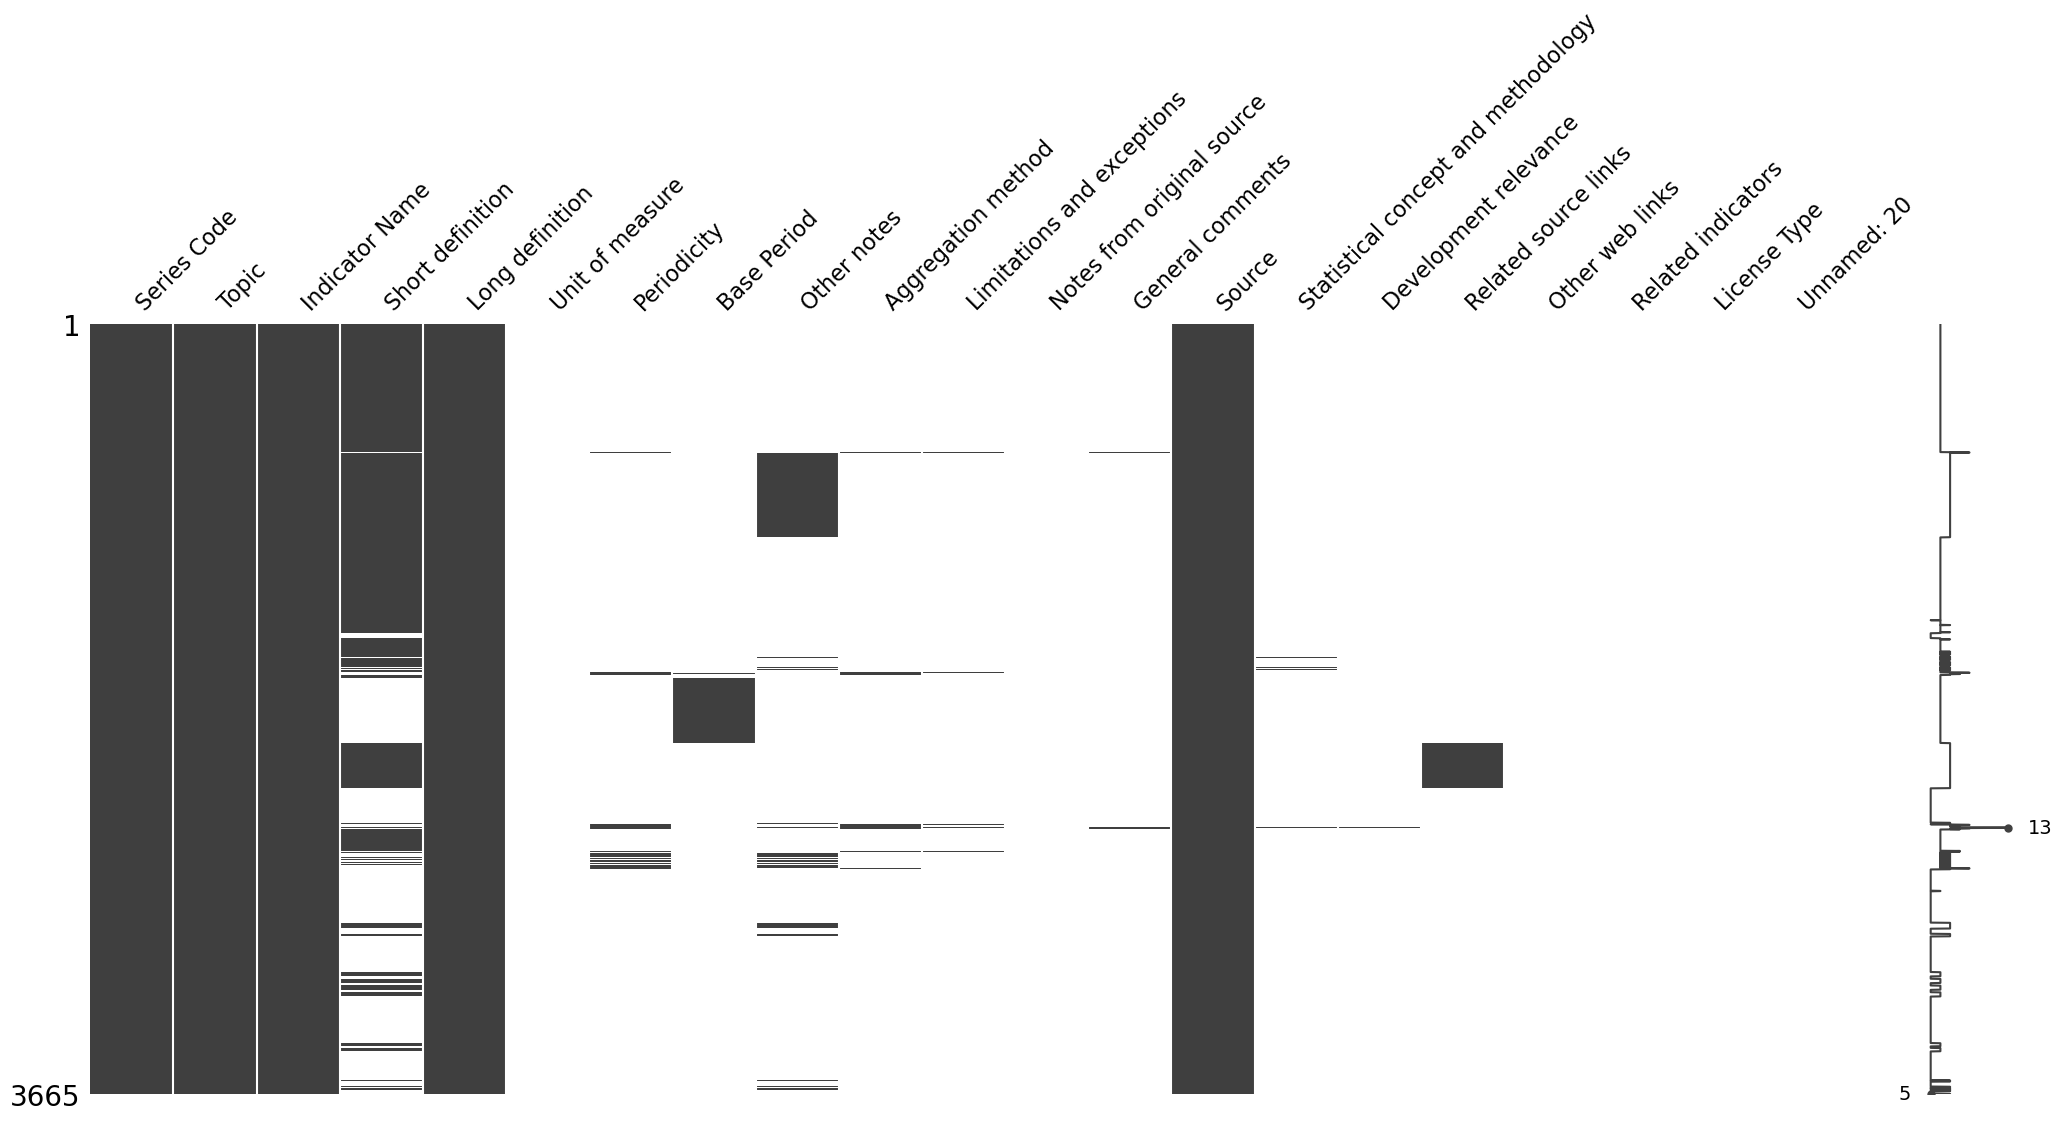

In [30]:
msno.matrix(series)

In [31]:
series['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

In [32]:
series.loc[series[['Series Code','Topic']].duplicated(keep=False), :]  # recherche des éventuels duplicatas

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20


In [33]:
series.loc[series[['Series Code']].duplicated(keep=False), :]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20


On supprime toutes les colonnes que nous n'allons pas utiliser

In [34]:
series = series.drop(columns=['Short definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Source', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20'])

In [35]:
series.head()

,Series Code,Topic,Indicator Name,Long definition
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...


In [36]:
series.to_csv('EdStatsSeries.csv')  # sauvegarde

## Le fichier 'EdStatsFootNote.csv'

In [37]:
FN = pd.read_csv('EdStatsFootNote.csv')
FN.shape

(643638, 5)

In [38]:
FN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [39]:
FN = FN.drop('Unnamed: 4', axis=1)

In [40]:
FN['DESCRIPTION'].unique() # pour voir un peu le contenu de cette colonne

array(['Country estimation.', 'UIS Estimation',
       'UNESCO Institute for Statistics (UIS) estimate', ...,
       'Uncertainty bound is 91.6 - 109.3',
       'Uncertainty bound is 54.3 - 76',
       'Uncertainty bound is 48.3 - 73.3'], dtype=object)

In [41]:
FN['DESCRIPTION'].value_counts()

Country Data                                      191188
UNESCO Institute for Statistics (UIS) estimate    171527
Estimated                                         117155
UIS Estimation                                     31395
Country estimation.                                26308
                                                   ...  
Uncertainty bound is 45.3 - 54.9                       1
Uncertainty bound is 61.8 - 81.7                       1
Uncertainty bound is 61.4 - 80.7                       1
Uncertainty bound is 27.3 - 48.2                       1
Uncertainty bound is 48.3 - 73.3                       1
Name: DESCRIPTION, Length: 9102, dtype: int64

In [42]:
display(FN)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.
...,...,...,...,...
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s


On va tenter de rendre le champs 'Year' numérique, pour cela on vérifie d'abord que la donnée a toujours le même format :

In [55]:
loc_diff_date = []
for i in range(len(FN)):
    if len(FN.iloc[i, 2]) == 6  & (FN.iloc[i, 2][0:2] == 'YR') :
        continue
    else :
        loc_diff_date.append(i)


In [56]:
display(loc_diff_date)  # dans mon notebook de préparation, le code ci-dessus retournait une liste vide, pourquoi pas ici ??

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [57]:
for i in range(len(FN)):
    FN.iloc[i, 2] = FN.iloc[i, 2][2:6]


Verification de l'execution, et en même temps un coup d'oeil sur 'la fraicheur' des données :

In [58]:
FN.groupby(['CountryCode','SeriesCode'])['Year'].max()

CountryCode  SeriesCode                 
ABW          SE.ADT.1524.LT.FE.ZS           2015
             SE.ADT.1524.LT.FM.ZS           2015
             SE.ADT.1524.LT.MA.ZS           2015
             SE.ADT.1524.LT.ZS              2015
             SE.ADT.LITR.FE.ZS              2015
                                            ... 
ZWE          UIS.TRANRA.23.GPV.GPI          1999
             UIS.UAPP.23                    2000
             UIS.UAPP.23.F                  2000
             UIS.UAPP.23.M                  2000
             UIS.XUNIT.PPPCONST.56.FSGOV    2010
Name: Year, Length: 72986, dtype: object

In [59]:
FN['Year'] = pd.to_numeric(FN['Year'], errors='coerce')

In [60]:
FN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CountryCode  643638 non-null  object
 1   SeriesCode   643638 non-null  object
 2   Year         643638 non-null  int64 
 3   DESCRIPTION  643638 non-null  object
dtypes: int64(1), object(3)
memory usage: 19.6+ MB


In [61]:
# la donnée 'Year' est bien numérique maintenant. Nous sauvegardons FN
FN.to_csv('EdStatsFootNote.csv')

## Le fichier EdStatsData.csv

In [1]:
import pandas as pd
data = pd.read_csv('EdStatsData.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [2]:
# suppression des colonnes vides ou presque:
data = data.drop(['2017','Unnamed: 69'], axis=1)

In [3]:
data.shape

(886930, 68)

In [4]:
len(data['Country Code'].unique())

242

In [5]:
len(data['Indicator Code'].unique())

3665

242 x 3665 = 886 930 : exactement le nb de lignes du fichier.

In [4]:
# suppression de petits pays repérés lors de l'analyse du fichier "country"
data = data[~(data['Country Code'] == 'AND')]

In [5]:
data = data[~(data['Country Code'].isin(['GIB','NRU']))]

In [6]:
data.shape

(875935, 68)

In [12]:
import missingno as msno
msno.matrix(data.sample(1000))

Il semble qu'il y ait des lignes completement vides (hors 4 premières colonnes d'indexage), nous allons les supprimer ultérieurement pour alléger le fichier. Dans un premier temps, nous allons éliminer les données avant 1995 qui ne nous interessent plus guère en 2023, en vu d'un développement de notre activité dans le futur. Nous allons aussi supprimer les données de prospectives au dela de 2045, peu pertinentes pour déterminer notre expansion dans les prochaines années, et pas fiables étant donné les continuelles variations inopinées de l'évolution des sociétés.

In [7]:
data = data.drop(['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980'], axis=1)

In [8]:
data = data.drop(['1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994'], axis=1)

In [9]:
data = data.drop(['2050','2055','2060','2065','2070','2075','2080','2085','2090','2095','2100'], axis=1)

In [10]:
data.reset_index(drop=True)
data.to_csv('C:\\Formation informatique\\Data scientist\\Projet 2\\Data\\EdStData.csv') # taille du fichier déjà divisée par 2 !

<Axes: >

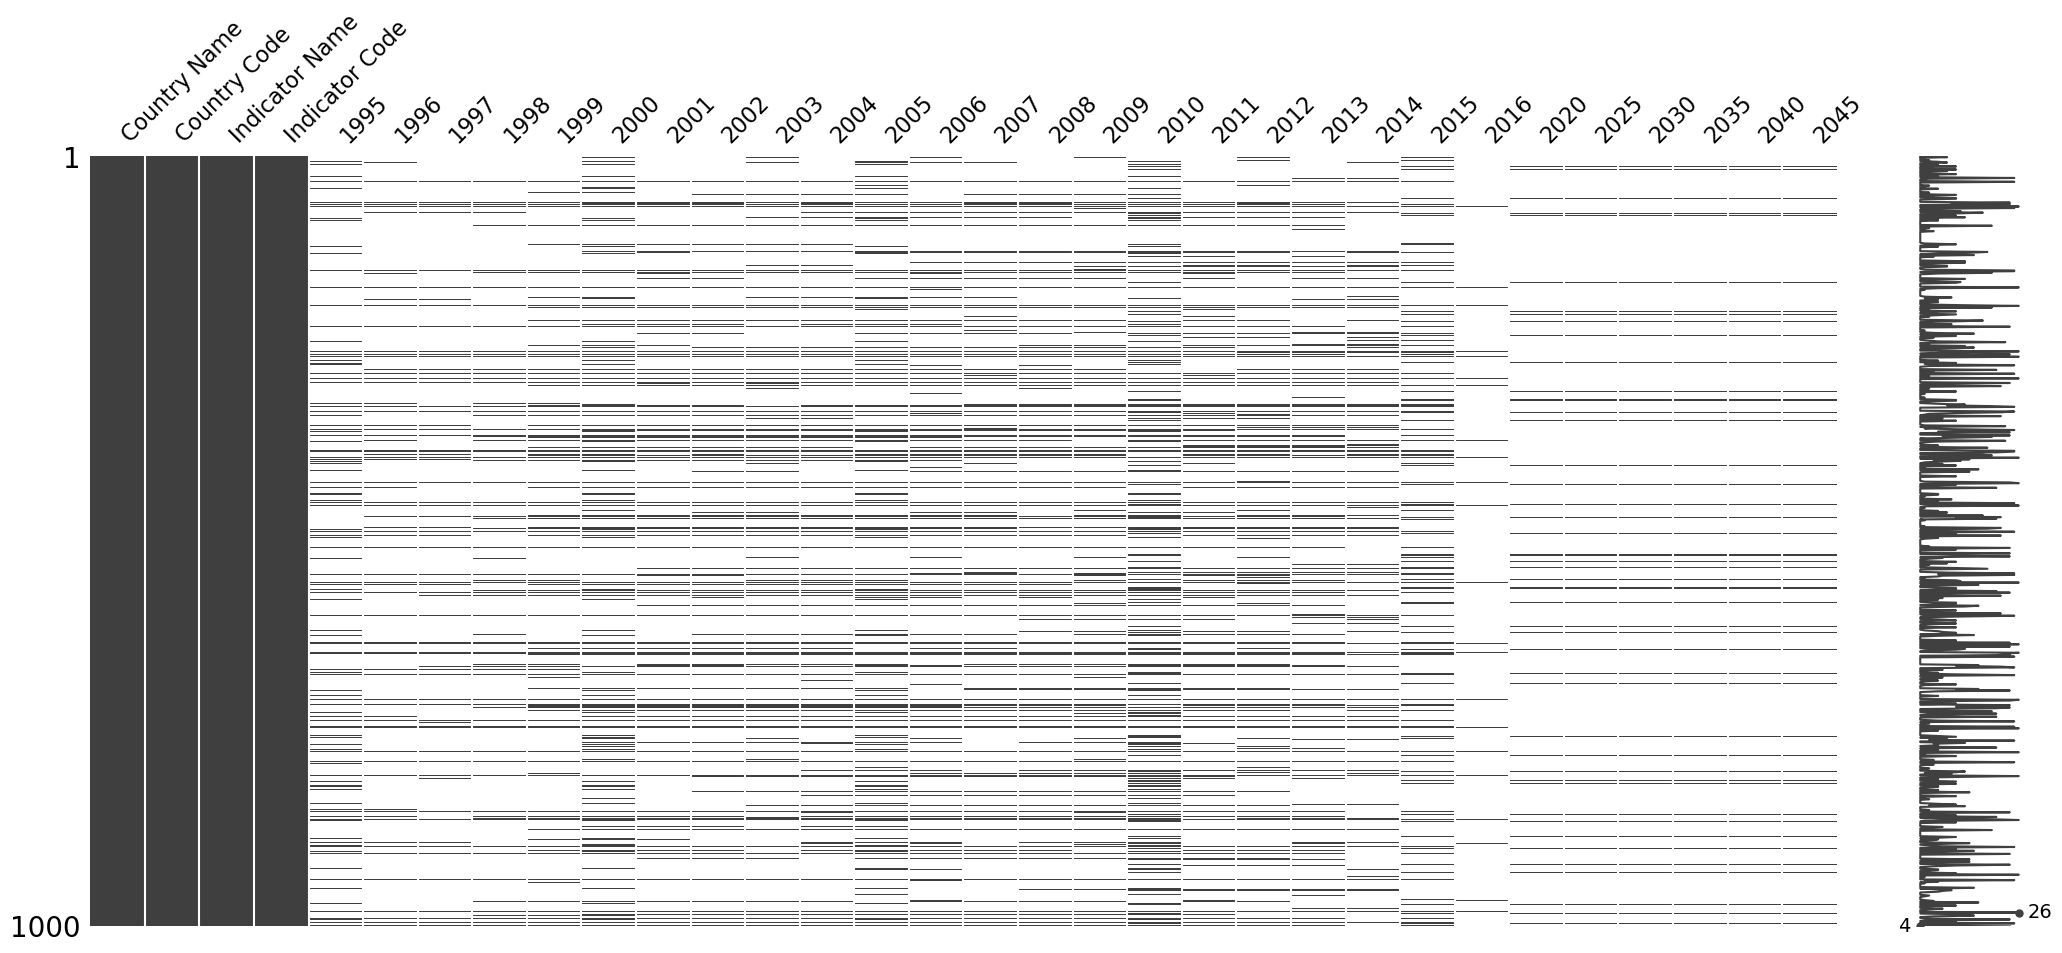

In [13]:
# data.to_csv('C:\\Formation informatique\\Data scientist\\Projet 2\\Data\\EdStDataSecure.csv')
msno.matrix(data.sample(1000))

Nous constatons que le gros des données est entre 1998 et 2015. On peut voir aussi que 2020, parfaitement dans l'alignement des données de prospectives, contient déjà uniquement des données anticipées. Tâchons de voir s'il y a des pays plus riches en données que d'autres: nous allons nous baser sur quelques colonnes significatives.

In [14]:
data.loc[~(data['2000'].isna()) & ~(data['2005'].isna()) & ~(data['2006'].isna()) & ~(data['2007'].isna()) & ~(data['2008'].isna()) & ~(data['2009'].isna()) & ~(data['2010'].isna()) & ~(data['2011'].isna()) & ~(data['2012'].isna()) & ~(data['2013'].isna()), 'Country Name'].value_counts()

Slovak Republic             725
Sweden                      694
Finland                     688
Lao PDR                     685
Lithuania                   680
                           ... 
Greenland                     7
Faroe Islands                 5
American Samoa                4
Northern Mariana Islands      2
St. Martin (French part)      2
Name: Country Name, Length: 239, dtype: int64

Donc en effet il y a une grande disparité de richesse d'information, les pays les moins bien lotis semblant être des petites iles ou autres pays peu peuplés. Regardons cela plus en détail :

In [14]:
nb_lignes_par_pays = data.loc[~(data['2000'].isna()) & ~(data['2005'].isna()) & ~(data['2006'].isna()) & ~(data['2007'].isna()) & ~(data['2008'].isna()) & ~(data['2009'].isna()) & ~(data['2010'].isna()) & ~(data['2011'].isna()) & ~(data['2012'].isna()) & ~(data['2013'].isna()), 'Country Name'].value_counts()

In [15]:
nb_lignes_par_pays[0:30]

Slovak Republic     725
Sweden              694
Finland             688
Lao PDR             685
Lithuania           680
Mexico              679
Cuba                655
Czech Republic      643
Switzerland         635
Bulgaria            630
Argentina           626
Latvia              623
Macao SAR, China    612
Cyprus              611
El Salvador         608
Kyrgyz Republic     605
Venezuela, RB       599
Denmark             595
Belize              595
Guatemala           586
Mozambique          585
Australia           585
Mauritius           581
Italy               569
Portugal            568
United States       568
Hungary             567
Spain               562
Norway              555
Azerbaijan          546
Name: Country Name, dtype: int64

In [17]:
nb_lignes_par_pays[31:60]

France                  542
Austria                 541
Lebanon                 539
Syrian Arab Republic    538
Poland                  538
Estonia                 537
Costa Rica              536
West Bank and Gaza      533
Slovenia                533
Ukraine                 532
Niger                   527
Lesotho                 525
Moldova                 521
Morocco                 521
Peru                    515
Belgium                 511
Korea, Rep.             509
United Kingdom          507
Panama                  506
Malta                   494
Israel                  489
Madagascar              488
Colombia                480
New Zealand             478
Romania                 477
Brunei Darussalam       472
Kazakhstan              468
Germany                 468
Burkina Faso            467
Name: Country Name, dtype: int64

In [18]:
nb_lignes_par_pays[200:]

Iraq                         245
Libya                        244
Korea, Dem. People’s Rep.    244
Somalia                      238
Bosnia and Herzegovina       229
Singapore                    229
Dominica                     226
Serbia                       192
Seychelles                   109
Puerto Rico                   78
Antigua and Barbuda           76
Montenegro                    65
St. Kitts and Nevis           64
Kiribati                      62
Marshall Islands              60
Bermuda                       54
Tuvalu                        45
Curacao                       30
South Sudan                   28
Palau                         26
San Marino                    23
Virgin Islands (U.S.)         22
New Caledonia                 22
French Polynesia              20
Guam                          20
Channel Islands               19
Liechtenstein                 18
Turks and Caicos Islands      16
Cayman Islands                16
Sint Maarten (Dutch part)     15
Monaco    

In [16]:
nb_lignes_par_pays[160:200]

Solomon Islands                   260
Myanmar                           260
Gabon                             258
Uruguay                           257
Sri Lanka                         257
Nicaragua                         257
Samoa                             257
Turkmenistan                      257
Congo, Rep.                       257
Ecuador                           257
Haiti                             257
Suriname                          257
Paraguay                          257
Grenada                           256
Yemen, Rep.                       256
Sierra Leone                      256
St. Vincent and the Grenadines    256
Botswana                          256
Brazil                            255
Ethiopia                          254
Equatorial Guinea                 253
Swaziland                         253
Guinea-Bissau                     253
Congo, Dem. Rep.                  253
Jordan                            253
Angola                            253
Liberia     

Fixons la limite à 247 lignes (sur 3665 potentielles) pour éliminer les pays, ainsi on ne risque pas d'éliminer trop vite certains pays pour lesquels on pourrait avoir du potentiel; Sous cette limite on a bien que des pays peu prometteurs de part leur faible population ou leur fermeture culturelle ou encore leur bas niveau de développement connu, et donc de plus un niveau d'information disponible très limité.

In [17]:
nb_lignes_par_pays[196:].index  # retourne bien la liste qui nous interesse :

Index(['Sao Tome and Principe', 'United Arab Emirates', 'Oman',
       'Micronesia, Fed. Sts.', 'Iraq', 'Libya', 'Korea, Dem. People’s Rep.',
       'Somalia', 'Bosnia and Herzegovina', 'Singapore', 'Dominica', 'Serbia',
       'Seychelles', 'Puerto Rico', 'Antigua and Barbuda', 'Montenegro',
       'St. Kitts and Nevis', 'Kiribati', 'Marshall Islands', 'Bermuda',
       'Tuvalu', 'Curacao', 'South Sudan', 'Palau', 'San Marino',
       'Virgin Islands (U.S.)', 'New Caledonia', 'French Polynesia', 'Guam',
       'Channel Islands', 'Liechtenstein', 'Turks and Caicos Islands',
       'Cayman Islands', 'Sint Maarten (Dutch part)', 'Monaco', 'Kosovo',
       'British Virgin Islands', 'Isle of Man', 'Greenland', 'Faroe Islands',
       'American Samoa', 'Northern Mariana Islands',
       'St. Martin (French part)'],
      dtype='object')

In [19]:
pays_a_garder = nb_lignes_par_pays[0:196].index
data = data[data['Country Name'].isin(pays_a_garder)]

In [20]:
data.reset_index(drop=True)
data.to_csv('EdStatsData.csv')

In [21]:
data.shape

(718340, 32)

In [22]:
data.to_csv('C:\\Formation informatique\\Data scientist\\Projet 2\\Data\\EdStDataSecure.csv') # sauvegarde de sécurité

Afin de faciliter l'analyse des 196 'pays' (il y a aussi des groupes dans ce total, que nous avons séparés du fichier 'country'), nous allons les séparer en groupes de taille moindre, ce qui permettra d'obtenir des graphiques lisibles. Une division possible est celle par région géographique, mais nous avons pu voir au début (fichier 'country') que la répartition en découlant n'est pas équilibrée. Voyons ce qu'il en est pour la répartition par 'Income Group':

In [4]:
country['Income Group'].value_counts()

Upper middle income     55
Lower middle income     50
High income: nonOECD    43
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

La répartition est plus équilibrée avec ces 'income groups', de plus les comparaisons au sein d'un même groupe seront plus pertinentes, nous allons donc l'utiliser, au moins pour commencer, et pour ce faire ajouter une colonne à notre fichier principal pour associer chaque pays à son groupe.

In [11]:
data['Income Group'] = 'tmp value'

In [12]:
Upper_middle_income = country.loc[country['Income Group'] == 'Upper middle income', 'Country Code'].unique()

In [14]:
Lower_middle_income = country.loc[country['Income Group'] == 'Lower middle income', 'Country Code'].unique()

In [15]:
High_income_nonOECD = country.loc[country['Income Group'] == 'High income: nonOECD', 'Country Code'].unique()

In [17]:
Low_income = country.loc[country['Income Group'] == 'Low income', 'Country Code'].unique()

In [18]:
High_income_OECD = country.loc[country['Income Group'] == 'High income: OECD', 'Country Code'].unique()

In [19]:
data.loc[data['Country Code'].isin(Upper_middle_income), 'Income Group'] = 'Upper middle income'

In [20]:
data.loc[data['Country Code'].isin(Lower_middle_income), 'Income Group'] = 'Lower middle income'

In [21]:
data.loc[data['Country Code'].isin(High_income_nonOECD), 'Income Group'] = 'High income: nonOECD'

In [22]:
data.loc[data['Country Code'].isin(Low_income), 'Income Group'] = 'Low income'

In [23]:
data.loc[data['Country Code'].isin(High_income_OECD), 'Income Group'] = 'High income: OECD'

In [24]:
display(data)

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,...,2014,2015,2016,2020,2025,2030,2035,2040,2045,Income Group
0,0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tmp value
1,1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tmp value
2,2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tmp value
3,3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tmp value
4,4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,71.81176,73.903511,74.425201,75.110817,76.254318,...,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tmp value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718335,886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,...,199464.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income
718336,886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,...,90.428120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income
718337,886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,...,93.188350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income
718338,886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,...,1.063890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income


Nous constatons la présence d'une colonne 'Unmamed: 0' en trop, et de lignes qui n'ont pas de valeur pertinente dans 'Income Group', qui semblent être les régions géographiques ou groupes économiques pré-établis, à priori plutôt lacunaires en données. Tâchons de clarifier & régler cela :

In [26]:
data = data.drop('Unnamed: 0', axis=1) # entre temps j'ai rechargé le fichier ...

In [27]:
data.loc[data['Income Group'] == 'tmp value', 'Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World'], dtype=object)

In [30]:
data.loc[(data['Country Name'] == 'European Union') & ~(data['2000'].isna()) & ~(data['2005'].isna()) & ~(data['2010'].isna()), :]

,Country Name,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,2000,...,2014,2015,2016,2020,2025,2030,2035,2040,2045,Income Group
21994,European Union,EUU,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,96.062241,96.608772,97.378990,98.571373,98.574059,98.601059,...,98.508331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tmp value
21995,European Union,EUU,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,95.897873,96.467499,97.337807,98.583557,98.606140,98.653687,...,98.489517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tmp value
21996,European Union,EUU,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.996670,0.997150,0.999180,1.000240,1.000630,1.001040,...,0.999630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tmp value
21997,European Union,EUU,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,96.218643,96.743156,97.418159,98.559792,98.543571,98.551041,...,98.526230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tmp value
22002,European Union,EUU,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,96.357758,96.449867,96.176361,96.551407,95.988518,95.595947,...,96.168381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tmp value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25086,European Union,EUU,"Total net enrolment rate, primary, gender pari...",UIS.NERT.1.GPI,0.998920,0.998190,0.998650,0.999250,0.999160,0.999850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tmp value
25088,European Union,EUU,Total outbound internationally mobile tertiary...,UIS.OE.56.40510,NaN,NaN,441095.000000,441095.000000,449745.000000,462301.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tmp value
25336,European Union,EUU,"Unemployment, female (% of female labor force)",SL.UEM.TOTL.FE.ZS,12.192279,12.027137,11.796376,11.282937,10.852057,10.530498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tmp value
25337,European Union,EUU,"Unemployment, male (% of male labor force)",SL.UEM.TOTL.MA.ZS,9.698659,9.682979,9.296144,8.729069,8.609553,8.182406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tmp value


On a donc uniquement les groupes 'géo-economiques', qui n'ont pas de 'Income group' défini. Pour le groupe 'European Union' on a quand même une bonne quantité de données, on ne va donc pas simplement supprimer ces données régionales mais les mettre dans un autre fichier 'EdStRegionData' pour que le fichier 'EdStData' soit cohérent, i.e. ne contienne que des lignes de données de véritables pays (et de même ce nouveau fichier aura ainsi aussi une cohérence interne).

In [31]:
RegionData = data.loc[data['Income Group'] == 'tmp value', :]

In [33]:
RegionData.reset_index(drop=True)
RegionData.to_csv('EdStRegionData.csv')

In [34]:
liste_codes_regions = RegionData['Country Code'].unique()

In [35]:
display(liste_codes_regions)

array(['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC',
       'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC',
       'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD'], dtype=object)

In [36]:
data = data.loc[~(data['Country Code'].isin(liste_codes_regions)), :]

In [38]:
data.reset_index(drop=True)
data.to_csv('EdStatsData.csv')

In [39]:
data.to_csv('C:\\Formation informatique\\Data scientist\\Projet 2\\Data\\EdStDataSecure.csv')

Avant de nous interesser aux indicateurs pour tâcher de cibler les pays les plus prometteurs pour l'expansion de academy, nous allons éliminer toutes les lignes sans donnée d'indicateur, qui sont très nombreuses, dans le fichier des données pays comme dans celui des données régions.

In [40]:
RegionData.shape

(91625, 33)

In [43]:
import datetime
from datetime import datetime
indic = 91624

while indic >= 0 :
    if RegionData.loc[indic].isna().sum() == 28 :
        RegionData = RegionData.drop(index=indic, axis=0)
    indic -= 1
    if indic % 5000 == 0 :
        print(str(indic) + '  ' + datetime.now().isoformat(' ')[0:19])

90000  2023-07-03 19:07:57
85000  2023-07-03 19:08:53
80000  2023-07-03 19:09:47
75000  2023-07-03 19:10:37
70000  2023-07-03 19:11:24
65000  2023-07-03 19:12:11
60000  2023-07-03 19:12:54
55000  2023-07-03 19:13:34
50000  2023-07-03 19:14:12
45000  2023-07-03 19:14:45
40000  2023-07-03 19:15:16
35000  2023-07-03 19:15:43
30000  2023-07-03 19:16:07
25000  2023-07-03 19:16:29
20000  2023-07-03 19:16:47
15000  2023-07-03 19:17:04
10000  2023-07-03 19:17:17
5000  2023-07-03 19:17:28
0  2023-07-03 19:17:36


In [44]:
RegionData.shape # pratiquement 90% des lignes en moins !

(9310, 33)

Nous observons qu'il faut quand même du temps pour réaliser ce nettoyage profond, aussi pour le fichier 'data' beaucoup plus gros, nous allons réaliser ce traitement par tronçons.

In [46]:
RegionData.reset_index(drop=True)
RegionData.to_csv('EdStRegionData.csv')

In [47]:
data.shape

(626715, 33)

In [52]:
indic = 626714
while indic >= 620000 :
    if data.loc[indic].isna().sum() == 28 :
        data = data.drop(index=indic, axis=0)
    indic -= 1
    if indic % 1000 == 0 :
        print(str(indic) + '  ' + datetime.now().isoformat(' ')[0:19])

626000  2023-07-03 21:55:15
625000  2023-07-03 21:55:54
624000  2023-07-03 21:56:50
623000  2023-07-03 21:57:36
622000  2023-07-03 21:58:06
621000  2023-07-03 21:58:43
620000  2023-07-03 21:59:39


In [53]:
while indic >= 600000 :
    if data.loc[indic].isna().sum() == 28 :
        data = data.drop(index=indic, axis=0)
    indic -= 1
    if indic % 1000 == 0 :
        print(str(indic) + '  ' + datetime.now().isoformat(' ')[0:19])

619000  2023-07-03 22:02:18
618000  2023-07-03 22:03:07
617000  2023-07-03 22:04:02
616000  2023-07-03 22:05:21
615000  2023-07-03 22:06:18
614000  2023-07-03 22:07:13
613000  2023-07-03 22:08:20
612000  2023-07-03 22:09:08
611000  2023-07-03 22:10:05
610000  2023-07-03 22:10:54
609000  2023-07-03 22:12:04
608000  2023-07-03 22:13:02
607000  2023-07-03 22:13:52
606000  2023-07-03 22:14:53
605000  2023-07-03 22:16:06
604000  2023-07-03 22:17:09
603000  2023-07-03 22:17:56
602000  2023-07-03 22:18:54
601000  2023-07-03 22:19:38
600000  2023-07-03 22:20:21


In [54]:
while indic >= 500000 :
    if data.loc[indic].isna().sum() == 28 :
        data = data.drop(index=indic, axis=0)
    indic -= 1
    if indic % 10000 == 0 :
        print(str(indic) + '  ' + datetime.now().isoformat(' ')[0:19])

590000  2023-07-03 22:30:46
580000  2023-07-03 22:37:42
570000  2023-07-03 22:44:17
560000  2023-07-03 22:51:46
550000  2023-07-03 22:59:08
540000  2023-07-03 23:05:35
530000  2023-07-03 23:13:33
520000  2023-07-03 23:20:17
510000  2023-07-03 23:28:04
500000  2023-07-03 23:34:33


In [55]:
while indic >= 0 :
    if data.loc[indic].isna().sum() == 28 :
        data = data.drop(index=indic, axis=0)
    indic -= 1
    if indic % 10000 == 0 :
        print(str(indic) + '  ' + datetime.now().isoformat(' ')[0:19])

490000  2023-07-03 23:42:19
480000  2023-07-03 23:48:11
470000  2023-07-03 23:54:20
460000  2023-07-04 00:00:36
450000  2023-07-04 00:06:58
440000  2023-07-04 00:13:52
430000  2023-07-04 00:20:20
420000  2023-07-04 00:26:20
410000  2023-07-04 00:32:55
400000  2023-07-04 00:39:04
390000  2023-07-04 00:43:52
380000  2023-07-04 00:50:21
370000  2023-07-04 00:56:01
360000  2023-07-04 01:01:56
350000  2023-07-04 01:07:36
340000  2023-07-04 01:14:05
330000  2023-07-04 01:21:03
320000  2023-07-04 01:27:45
310000  2023-07-04 01:32:37
300000  2023-07-04 01:38:52
290000  2023-07-04 01:45:19
280000  2023-07-04 01:51:15
270000  2023-07-04 01:57:46
260000  2023-07-04 02:03:07
250000  2023-07-04 02:09:00
240000  2023-07-04 02:14:01
230000  2023-07-04 02:19:01
220000  2023-07-04 02:24:37
210000  2023-07-04 02:29:00
200000  2023-07-04 02:34:10
190000  2023-07-04 02:38:52
180000  2023-07-04 02:43:58
170000  2023-07-04 02:49:24
160000  2023-07-04 02:54:31
150000  2023-07-04 02:59:23
140000  2023-07-04 0

KeyError: 91624

In [62]:
data.shape
#indic

(360699, 33)

In [ ]:
indic = 91622
while indic >= 0 :
    if data.loc[indic].isna().sum() == 28 :
        data = data.drop(index=indic, axis=0)
    indic -= 1
    if indic % 10000 == 0 :
        print(str(indic) + '  ' + datetime.now().isoformat(' ')[0:19])

In [60]:
data.reset_index(drop=True)

,Country Name,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,2000,...,2014,2015,2016,2020,2025,2030,2035,2040,2045,Income Group
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,50.627232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income
1,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,37.641541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income
2,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,0.598370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income
3,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,62.906952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income
4,Afghanistan,AFG,"Adjusted net enrolment rate, upper secondary, ...",UIS.NERA.3,NaN,NaN,NaN,NaN,NaN,NaN,...,32.417030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360694,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,199464.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income
360695,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,90.428120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income
360696,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.188350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income
360697,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.063890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low income


In [61]:
data.to_csv('EdStatsData.csv')

Malgré l'erreur qui s'est produite vers la fin, (au niveau de la valeur de 'indic' utilisée pour le fichier 'RegionData', avec laquelle j'avais dû lancer le nettoyage de 'data' une première fois par erreur) le nettoyage a été efficace : le nb de lignes est passé de 626714 à 360699.

## Utilisation des indicateurs

Nous l'avons vu lors de notre prise en main des données, la notion de 'income' est importante dans l'analyse, en effet pour que l'enseignement soit developpé dans un pays il faut des écoles, des fournitures, des enseignants et une administration associée, et, nous concernant, des réseaux numériques et des PC. Il faut aussi que les parents puisse prendre en charge les adolescents et jeunes adultes afin qu'ils se consacrent aux études. C'est donc un critère que nous allons utiliser dans notre recherche des meilleurs pays potentiels pour notre expansion, mais nous allons l'associer à l'importance de la population de jeunes en âge d'aller au lycée ou à l'université; En effet le public d'adultes de plus de 30 ans en reconvertion / formation continue est peu significatif par rapport aux plus jeunes en formation initiale ou en 'raccrochage'.

In [65]:
liste_annees_eval = ['1995','2000','2005','2010','2012','2013','2015','2020']
data.loc[data['Indicator Code'] == 'NY.GDP.PCAP.PP.KD', liste_annees_eval]

,1995,2000,2005,2010,2012,2013,2015,2020
92871,NaN,NaN,1136.123214,1614.255001,1839.273579,1814.155825,1747.978457,NaN
96536,4278.662826,5668.539223,7732.958430,9927.119576,10369.758341,10492.740470,10971.223704,NaN
100201,9295.420114,10211.001857,12322.484261,12870.602699,13161.961673,13253.615476,13724.723853,NaN
103866,2966.554626,3508.905125,3949.272800,5895.114088,5998.638601,6185.013829,6231.067992,NaN
107531,13893.522659,14899.870046,15518.678510,18712.063077,19224.874400,19482.190295,19101.297392,NaN
...,...,...,...,...,...,...,...,...
701261,2041.755557,2649.718463,3484.907807,4486.259459,4910.312570,5121.738968,5667.408901,NaN
704926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
708591,3532.144466,3893.822761,4155.375842,4478.743690,3793.412857,3872.789957,2641.045829,NaN
712256,2029.481349,2102.983169,2482.582018,3279.277161,3509.413319,3576.680691,3627.202041,NaN


In [10]:
# NY.GDP.PCAP.PP.KD est un indicateur de revenu par habitant relativement bien renseigné
NY_GDP_PCAP_PP_KD_data_umi = data.loc[(data['Indicator Code'] == 'NY.GDP.PCAP.PP.KD') & (data['Income Group'] == 'Upper middle income'), :]
NY_GDP_PCAP_PP_KD_data_umi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 1955 to 303681
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    43 non-null     object 
 1   Country Code    43 non-null     object 
 2   Indicator Name  43 non-null     object 
 3   Indicator Code  43 non-null     object 
 4   1995            42 non-null     float64
 5   1996            42 non-null     float64
 6   1997            42 non-null     float64
 7   1998            42 non-null     float64
 8   1999            42 non-null     float64
 9   2000            42 non-null     float64
 10  2001            43 non-null     float64
 11  2002            43 non-null     float64
 12  2003            43 non-null     float64
 13  2004            43 non-null     float64
 14  2005            43 non-null     float64
 15  2006            43 non-null     float64
 16  2007            43 non-null     float64
 17  2008            43 non-null   

In [21]:
NY_GDP_PCAP_PP_KD_data_umi['m-14-15-16'] = 100.00

C:\Users\jlper\AppData\Local\Temp\ipykernel_18296\2486401846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_GDP_PCAP_PP_KD_data_umi['m-14-15-16'] = 100.00


l'instruction ci-dessus a quand même fonctionné malgré l'avertissement (pourtant syntaxe classique !)

In [23]:
# Nous allons utiliser les trois dernières années disponibles, soit 2014, 2015 et 2016
#import numpy as np
#NY_GDP_PCAP_PP_KD_data_umi['m-14-15-16'] = 100

for i in range(len(NY_GDP_PCAP_PP_KD_data_umi)) :
    d = 0
    s = 0
    if ~(str(NY_GDP_PCAP_PP_KD_data_umi.iloc[i,23]) == 'nan') :
        d += 1
        s += NY_GDP_PCAP_PP_KD_data_umi.iloc[i,23]
    if ~(str(NY_GDP_PCAP_PP_KD_data_umi.iloc[i,24]) == 'nan') :
        d += 1
        s += NY_GDP_PCAP_PP_KD_data_umi.iloc[i,24]
    if ~(str(NY_GDP_PCAP_PP_KD_data_umi.iloc[i,25]) == 'nan') :
        d += 1
        s += NY_GDP_PCAP_PP_KD_data_umi.iloc[i,25]
    NY_GDP_PCAP_PP_KD_data_umi.iloc[i,33] = s / d


In [25]:
NY_GDP_PCAP_PP_KD_data_umi

,Country Name,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,2000,...,2015,2016,2020,2025,2030,2035,2040,2045,Income Group,m-14-15-16
1955,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,4278.662826,4697.123771,4214.331719,4622.997404,5280.494746,5668.539223,...,10971.223704,11359.099157,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,11010.458842
4047,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,9295.420114,9509.687657,9461.355117,9796.739936,9968.967712,10211.001857,...,13724.723853,13921.180022,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,13709.747246
5500,Angola,AGO,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2966.554626,3205.950938,3365.983830,3498.725632,3511.198573,3508.905125,...,6231.067992,5984.640422,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,6158.613698
6788,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13893.522659,14485.507685,15479.379129,15894.558053,15186.130197,14899.870046,...,19101.297392,18489.434893,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,18796.093410
15606,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,3319.767349,3329.134804,3488.410025,3801.002521,4046.607467,4458.998423,...,16698.863653,15994.009742,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,16469.326305
23643,Belarus,BLR,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,5451.833517,5623.240021,6290.914316,6851.859695,7114.684958,7562.883999,...,17229.555190,16742.255915,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,17305.340317
27203,Belize,BLZ,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,6207.325586,6098.211010,6088.447432,6078.194025,6370.062852,6959.303816,...,8061.331831,7846.015832,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,7970.944186
35061,Botswana,BWA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,8903.746295,9217.414228,9753.109608,9635.307714,10378.815197,10410.702676,...,15356.457617,15723.237065,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,15664.788305
36597,Brazil,BRA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,11072.481561,11137.344106,11334.571255,11197.455457,11081.410694,11370.729455,...,14666.018168,14023.691623,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,14686.902053
39950,Bulgaria,BGR,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,8446.191884,8625.701757,8582.912858,8942.791618,8488.558805,8958.050606,...,17000.068662,17794.423421,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,17032.236810


Text(0.5, 1.0, 'GDP per capita ($)')

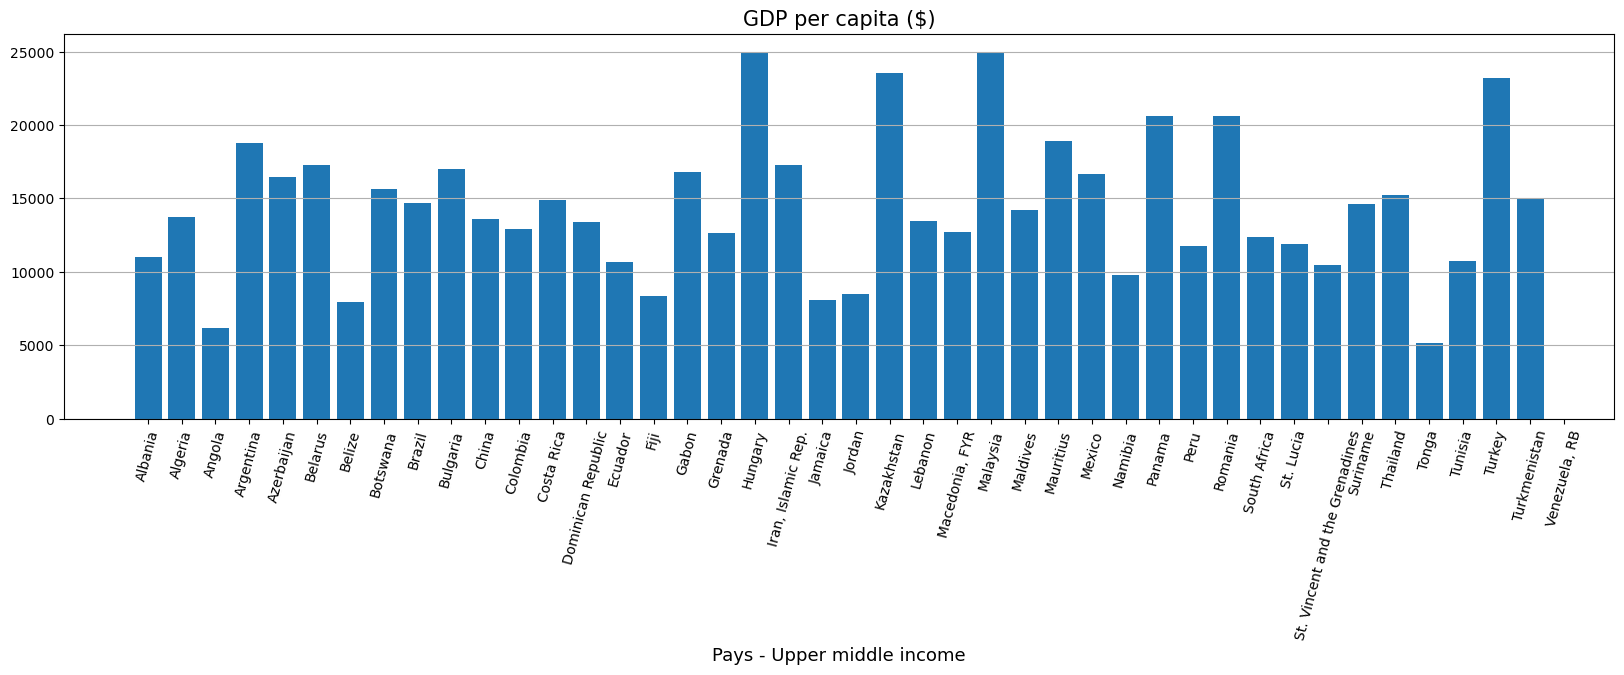

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.bar(height=NY_GDP_PCAP_PP_KD_data_umi['m-14-15-16'], x=NY_GDP_PCAP_PP_KD_data_umi['Country Name']) #, width=1.5)

plt.grid(axis='y')

plt.xlabel("Pays - Upper middle income", fontsize=13)
plt.xticks(rotation=75)

plt.title("GDP per capita ($)", fontsize=15)


In [27]:
# On ordonne par montant pour plus de lisibilité :
NY_GDP_PCAP_PP_KD_data_umi = NY_GDP_PCAP_PP_KD_data_umi.sort_values('m-14-15-16')

Text(0.5, 1.0, 'GDP per capita ($)')

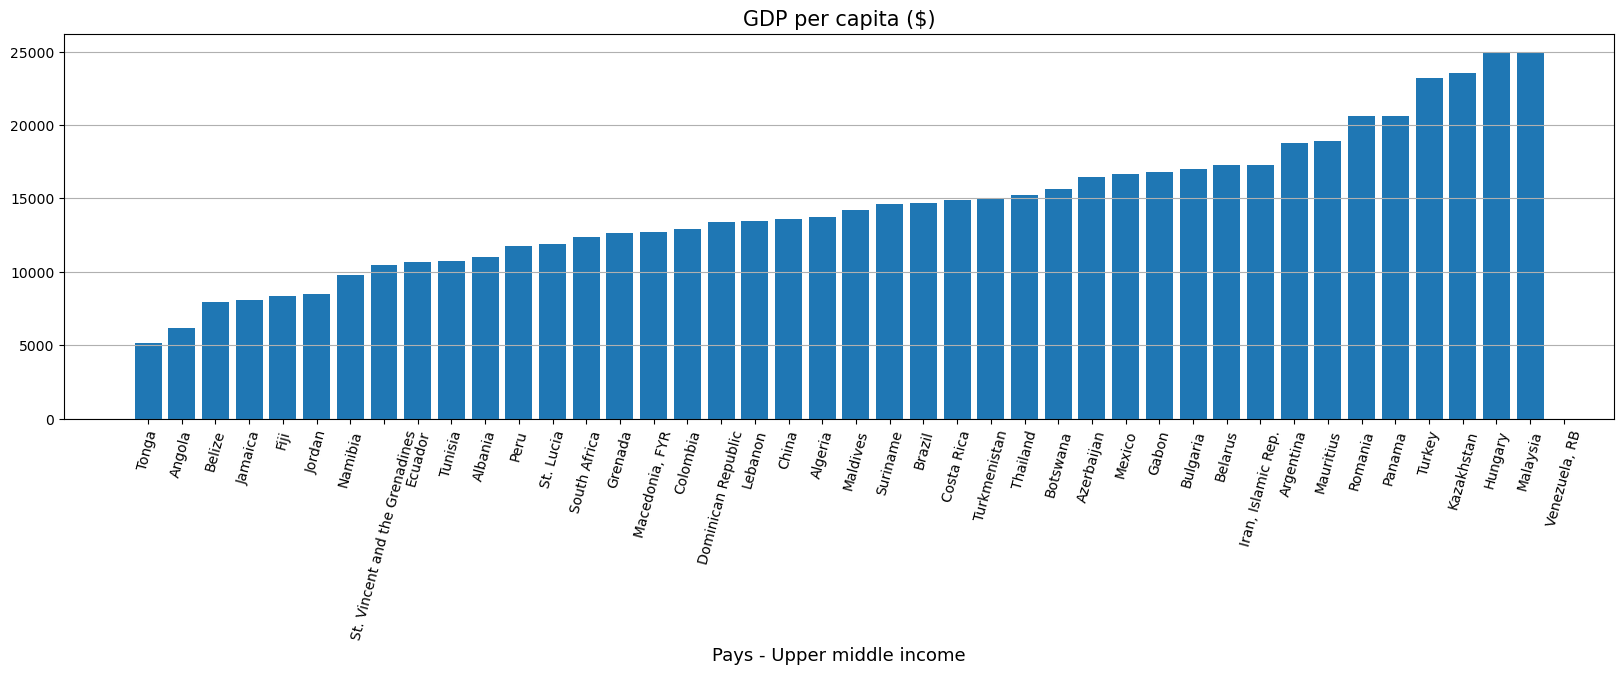

In [28]:
plt.figure(figsize=(20,5))

plt.bar(height=NY_GDP_PCAP_PP_KD_data_umi['m-14-15-16'], x=NY_GDP_PCAP_PP_KD_data_umi['Country Name']) #, width=1.5)

plt.grid(axis='y')

plt.xlabel("Pays - Upper middle income", fontsize=13)
plt.xticks(rotation=75)

plt.title("GDP per capita ($)", fontsize=15)

ll y a un problème avec le Venezuela, enquettons :

In [29]:
NY_GDP_PCAP_PP_KD_data_umi.loc[NY_GDP_PCAP_PP_KD_data_umi['Country Code'] == 'VEN', ['2014','2015','2016','m-14-15-16']]

,2014,2015,2016,m-14-15-16
303681,16745.02198,NaN,NaN,NaN


In [30]:
NY_GDP_PCAP_PP_KD_data_umi.loc[NY_GDP_PCAP_PP_KD_data_umi['Country Code'] == 'PAN', ['2014','2015','2016','m-14-15-16']]

,2014,2015,2016,m-14-15-16
221517,19871.838071,20674.299728,21334.939678,20627.025826


In [31]:
NY_GDP_PCAP_PP_KD_data_umi.iloc[:,[23,24,25,33]]

,2014,2015,2016,m-14-15-16
282871,5031.629951,5189.842453,5327.267200,5182.913201
5500,6260.132681,6231.067992,5984.640422,6158.613698
27203,8005.484897,8061.331831,7846.015832,7970.944186
144093,8051.244028,8095.261867,8179.620340,8108.708745
98285,8222.253816,8477.644733,8447.264216,8382.387588
147663,8622.185468,8491.050311,8389.604574,8500.946784
204657,9617.396960,9964.222994,9852.035111,9811.218355
261023,10315.821521,10447.528389,10623.385522,10462.245144
86456,10901.418556,10749.128874,10424.264154,10691.603861
286332,10751.446075,10749.859167,10752.016825,10751.107356


In [32]:
str(NY_GDP_PCAP_PP_KD_data_umi.iloc[42,33]) == 'nan'

True

In [33]:
# problème peu compréhensible, pour l'instant je corrige seulement la valeur pour VEN
NY_GDP_PCAP_PP_KD_data_umi.iloc[42,33] = 16745.021980
NY_GDP_PCAP_PP_KD_data_umi = NY_GDP_PCAP_PP_KD_data_umi.sort_values('m-14-15-16')

Text(0.5, 1.0, 'GDP per capita ($)')

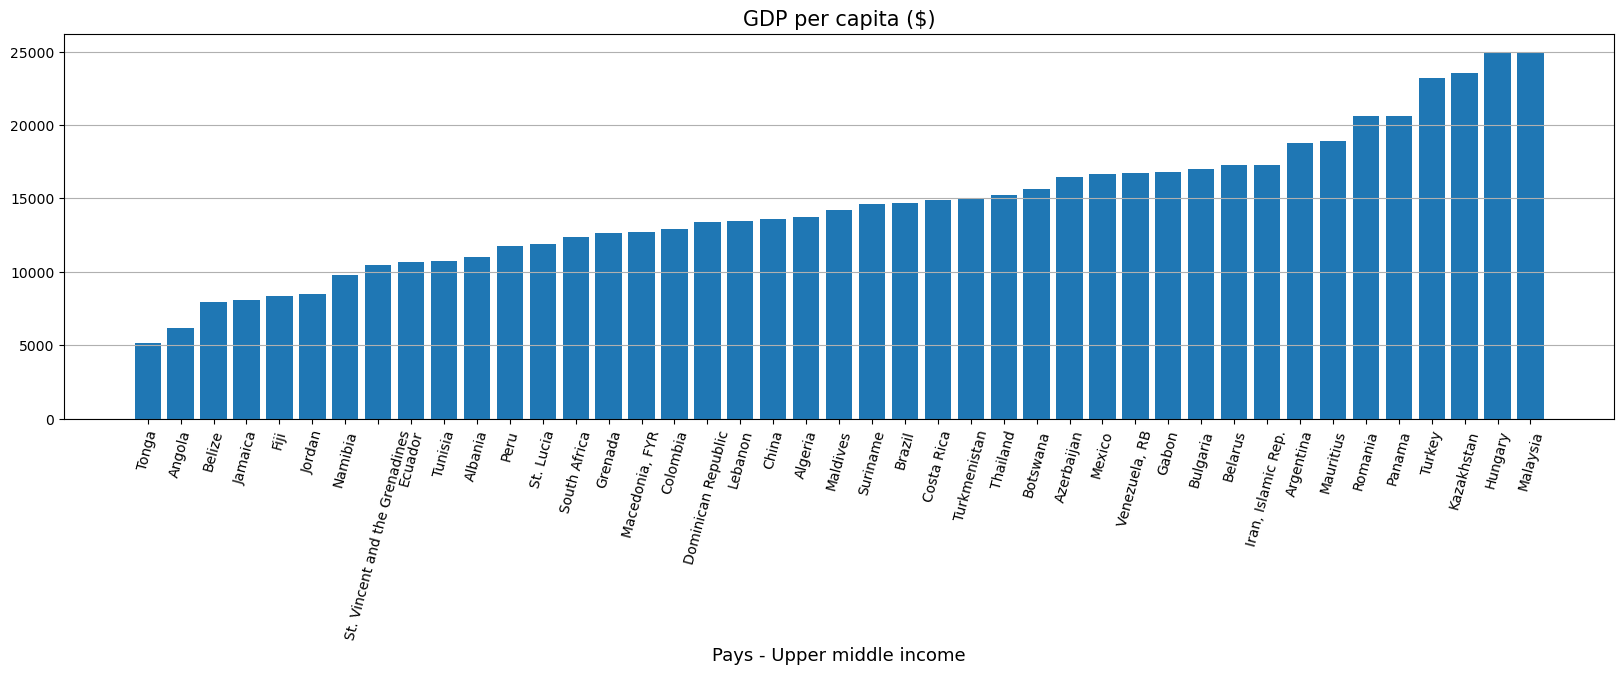

In [34]:
plt.figure(figsize=(20,5))

plt.bar(height=NY_GDP_PCAP_PP_KD_data_umi['m-14-15-16'], x=NY_GDP_PCAP_PP_KD_data_umi['Country Name']) #, width=1.5)

plt.grid(axis='y')

plt.xlabel("Pays - Upper middle income", fontsize=13)
plt.xticks(rotation=75)

plt.title("GDP per capita ($)", fontsize=15)

Nous allons associer cet indicateur de revenu par habitant à la population des 15-29 ans : si les deux sont faibles, le pays n'aura pas beaucoup d'interet pour notre developpement.

In [35]:
BAR_POP_1519_data_umi = data.loc[(data['Indicator Code'] == 'BAR.POP.1519') & (data['Income Group'] == 'Upper middle income'), :]
BAR_POP_2024_data_umi = data.loc[(data['Indicator Code'] == 'BAR.POP.2024') & (data['Income Group'] == 'Upper middle income'), :]
BAR_POP_2529_data_umi = data.loc[(data['Indicator Code'] == 'BAR.POP.2525') & (data['Income Group'] == 'Upper middle income'), :]

In [36]:
BAR_POP_1519_data_umi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1642 to 303490
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    34 non-null     object 
 1   Country Code    34 non-null     object 
 2   Indicator Name  34 non-null     object 
 3   Indicator Code  34 non-null     object 
 4   1995            34 non-null     float64
 5   1996            0 non-null      float64
 6   1997            0 non-null      float64
 7   1998            0 non-null      float64
 8   1999            0 non-null      float64
 9   2000            34 non-null     float64
 10  2001            0 non-null      float64
 11  2002            0 non-null      float64
 12  2003            0 non-null      float64
 13  2004            0 non-null      float64
 14  2005            34 non-null     float64
 15  2006            0 non-null      float64
 16  2007            0 non-null      float64
 17  2008            0 non-null    

In [37]:
BAR_POP_2024_data_umi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1644 to 303492
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    34 non-null     object 
 1   Country Code    34 non-null     object 
 2   Indicator Name  34 non-null     object 
 3   Indicator Code  34 non-null     object 
 4   1995            34 non-null     float64
 5   1996            0 non-null      float64
 6   1997            0 non-null      float64
 7   1998            0 non-null      float64
 8   1999            0 non-null      float64
 9   2000            34 non-null     float64
 10  2001            0 non-null      float64
 11  2002            0 non-null      float64
 12  2003            0 non-null      float64
 13  2004            0 non-null      float64
 14  2005            34 non-null     float64
 15  2006            0 non-null      float64
 16  2007            0 non-null      float64
 17  2008            0 non-null    

In [38]:
BAR_POP_2529_data_umi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1648 to 303496
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    34 non-null     object 
 1   Country Code    34 non-null     object 
 2   Indicator Name  34 non-null     object 
 3   Indicator Code  34 non-null     object 
 4   1995            34 non-null     float64
 5   1996            0 non-null      float64
 6   1997            0 non-null      float64
 7   1998            0 non-null      float64
 8   1999            0 non-null      float64
 9   2000            34 non-null     float64
 10  2001            0 non-null      float64
 11  2002            0 non-null      float64
 12  2003            0 non-null      float64
 13  2004            0 non-null      float64
 14  2005            34 non-null     float64
 15  2006            0 non-null      float64
 16  2007            0 non-null      float64
 17  2008            0 non-null    

In [41]:
POP_1529_data_umi = BAR_POP_1519_data_umi[['Country Name','Country Code','2010']]

In [42]:
for i in range(34) :
    POP_1529_data_umi.iloc[i,2] += (BAR_POP_2024_data_umi.iloc[i,19] + BAR_POP_2529_data_umi.iloc[i,19])


In [43]:
POP_1529_data_umi.head()

,Country Name,Country Code,2010
1642,Albania,ALB,854.0
3883,Algeria,DZA,10889.0
6589,Argentina,ARG,10050.0
27005,Belize,BLZ,88.0
34858,Botswana,BWA,614.0


Text(0.5, 1.0, 'Population totale des 15-29 ans 2010')

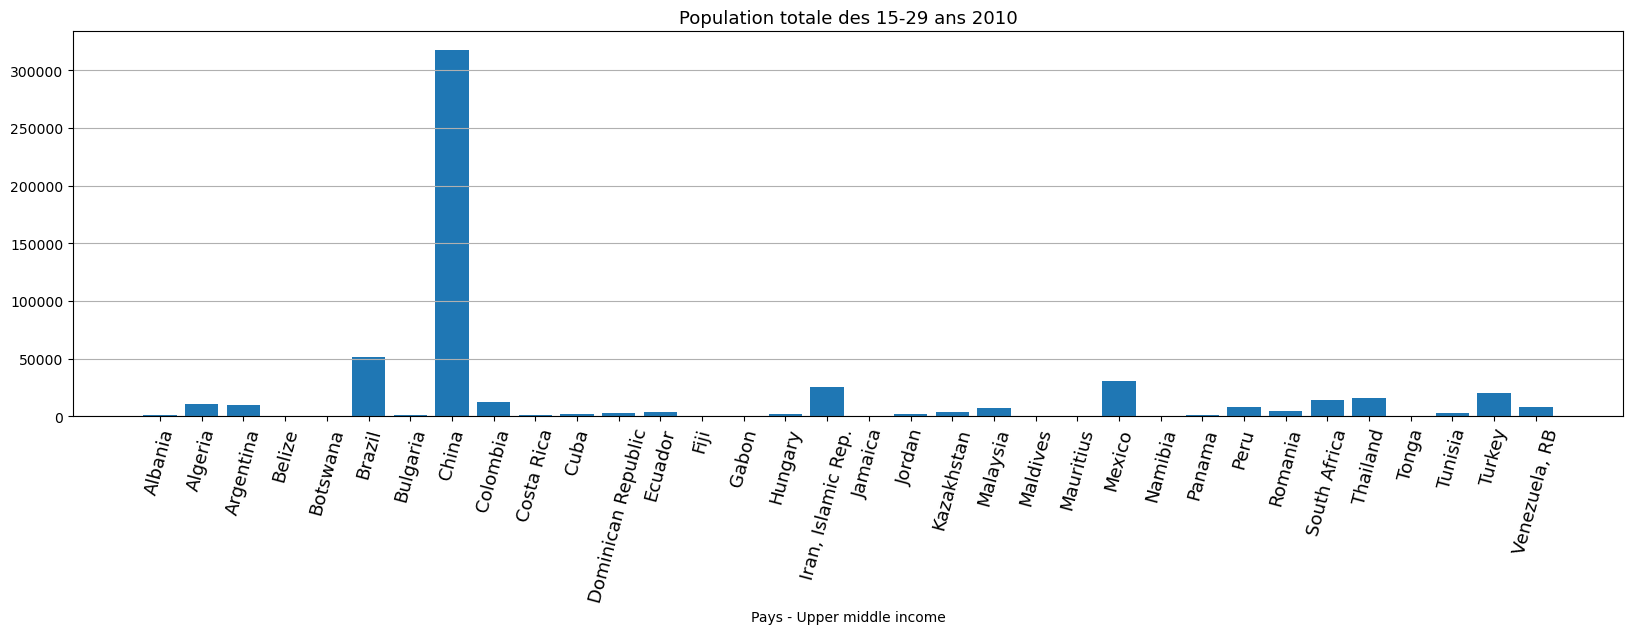

In [44]:
plt.figure(figsize=(20,5))

plt.bar(height=POP_1529_data_umi['2010'], x=POP_1529_data_umi['Country Name'])

plt.grid(axis='y')

plt.xlabel("Pays - Upper middle income")
plt.xticks(rotation=75, fontsize=13)

plt.title("Population totale des 15-29 ans 2010", fontsize=13)

Nous allons supprimer la Chine, qui n'est pas un pays qui va nous interesser.

In [45]:
NY_GDP_PCAP_PP_KD_data_umi = NY_GDP_PCAP_PP_KD_data_umi.loc[~(NY_GDP_PCAP_PP_KD_data_umi['Country Code'] == 'CHN'), :]
BAR_POP_1519_data_umi = BAR_POP_1519_data_umi.loc[~(BAR_POP_1519_data_umi['Country Code'] == 'CHN'), : ]
BAR_POP_2024_data_umi = BAR_POP_2024_data_umi.loc[~(BAR_POP_2024_data_umi['Country Code'] == 'CHN'), : ]
BAR_POP_2529_data_umi = BAR_POP_2529_data_umi.loc[~(BAR_POP_2529_data_umi['Country Code'] == 'CHN'), : ]
POP_1529_data_umi = POP_1529_data_umi.loc[~(POP_1529_data_umi['Country Code'] == 'CHN'), : ]

In [46]:
POP_1529_data_umi = POP_1529_data_umi.sort_values('2010')

Text(0.5, 1.0, 'Population totale des 15-29 ans 2010')

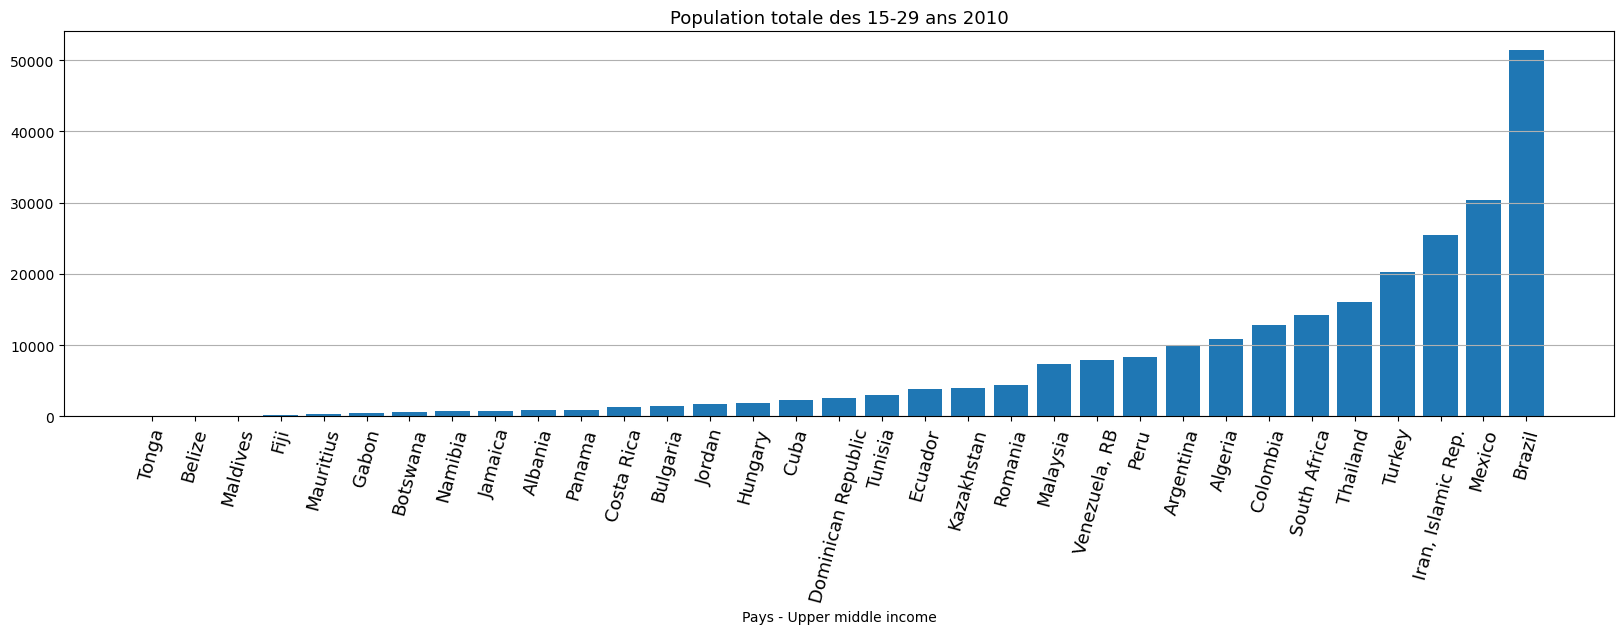

In [47]:
plt.figure(figsize=(20,5))

plt.bar(height=POP_1529_data_umi['2010'], x=POP_1529_data_umi['Country Name'])

plt.grid(axis='y')

plt.xlabel("Pays - Upper middle income")
plt.xticks(rotation=75, fontsize=13)

plt.title("Population totale des 15-29 ans 2010", fontsize=13)

Nous allons supprimer les iles et pays les moins peuplés : (par code pays) TON, BLZ, MDV, FJI, MUS, GAB, BWA, NAM, JAM sachant que la majorité d'entre eux figurent également dans les pays aux revenus les plus bas parmis ce groupe. Pour les autres, tâchons de croiser les données de population avec celles de revenu moyen par habitant, pour déterminer quels seraient les meilleurs candidats pour notre expansion.

In [48]:
liste_elim = ['TON','BLZ','MDV','FJI','MUS','GAB','BWA','NAM','JAM']
NY_GDP_PCAP_PP_KD_data_umi = NY_GDP_PCAP_PP_KD_data_umi.loc[~(NY_GDP_PCAP_PP_KD_data_umi['Country Code'].isin(liste_elim)), :]
BAR_POP_1519_data_umi = BAR_POP_1519_data_umi.loc[~(BAR_POP_1519_data_umi['Country Code'].isin(liste_elim)), : ]
BAR_POP_2024_data_umi = BAR_POP_2024_data_umi.loc[~(BAR_POP_2024_data_umi['Country Code'].isin(liste_elim)), : ]
BAR_POP_2529_data_umi = BAR_POP_2529_data_umi.loc[~(BAR_POP_2529_data_umi['Country Code'].isin(liste_elim)), : ]
POP_1529_data_umi = POP_1529_data_umi.loc[~(POP_1529_data_umi['Country Code'].isin(liste_elim)), : ]

In [49]:
data_merge_umi = pd.merge(NY_GDP_PCAP_PP_KD_data_umi, POP_1529_data_umi, on='Country Code', how='outer')

In [50]:
data_merge_umi.head()

,Country Name_x,Country Code,Indicator Name,Indicator Code,1995,1996,1997,1998,1999,2000,...,2020,2025,2030,2035,2040,2045,Income Group,m-14-15-16,Country Name_y,2010_y
0,Angola,AGO,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,2966.554626,3205.950938,3365.983830,3498.725632,3511.198573,3508.905125,...,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,6158.613698,NaN,NaN
1,Jordan,JOR,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,6895.206587,6825.007646,6881.670401,6950.139348,7062.437155,7234.964751,...,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,8500.946784,Jordan,1775.0
2,St. Vincent and the Grenadines,VCT,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,6617.845538,6705.940527,6945.601882,7235.134246,7434.165952,7554.635333,...,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,10462.245144,NaN,NaN
3,Ecuador,ECU,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,7726.192086,7696.583402,7867.057933,7964.486069,7443.335645,7387.615879,...,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,10691.603861,Ecuador,3850.0
4,Tunisia,TUN,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,6131.297603,6468.616998,6727.454500,6963.760802,7305.146991,7573.929213,...,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,10751.107356,Tunisia,3061.0


In [51]:
data_merge_umi.info()  # une ligne a toutes les valeurs nulles sauf CCode: Cuba

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name_x  33 non-null     object 
 1   Country Code    34 non-null     object 
 2   Indicator Name  33 non-null     object 
 3   Indicator Code  33 non-null     object 
 4   1995            33 non-null     float64
 5   1996            33 non-null     float64
 6   1997            33 non-null     float64
 7   1998            33 non-null     float64
 8   1999            33 non-null     float64
 9   2000            33 non-null     float64
 10  2001            33 non-null     float64
 11  2002            33 non-null     float64
 12  2003            33 non-null     float64
 13  2004            33 non-null     float64
 14  2005            33 non-null     float64
 15  2006            33 non-null     float64
 16  2007            33 non-null     float64
 17  2008            33 non-null     float

IndexError: index 34 is out of bounds for axis 0 with size 34

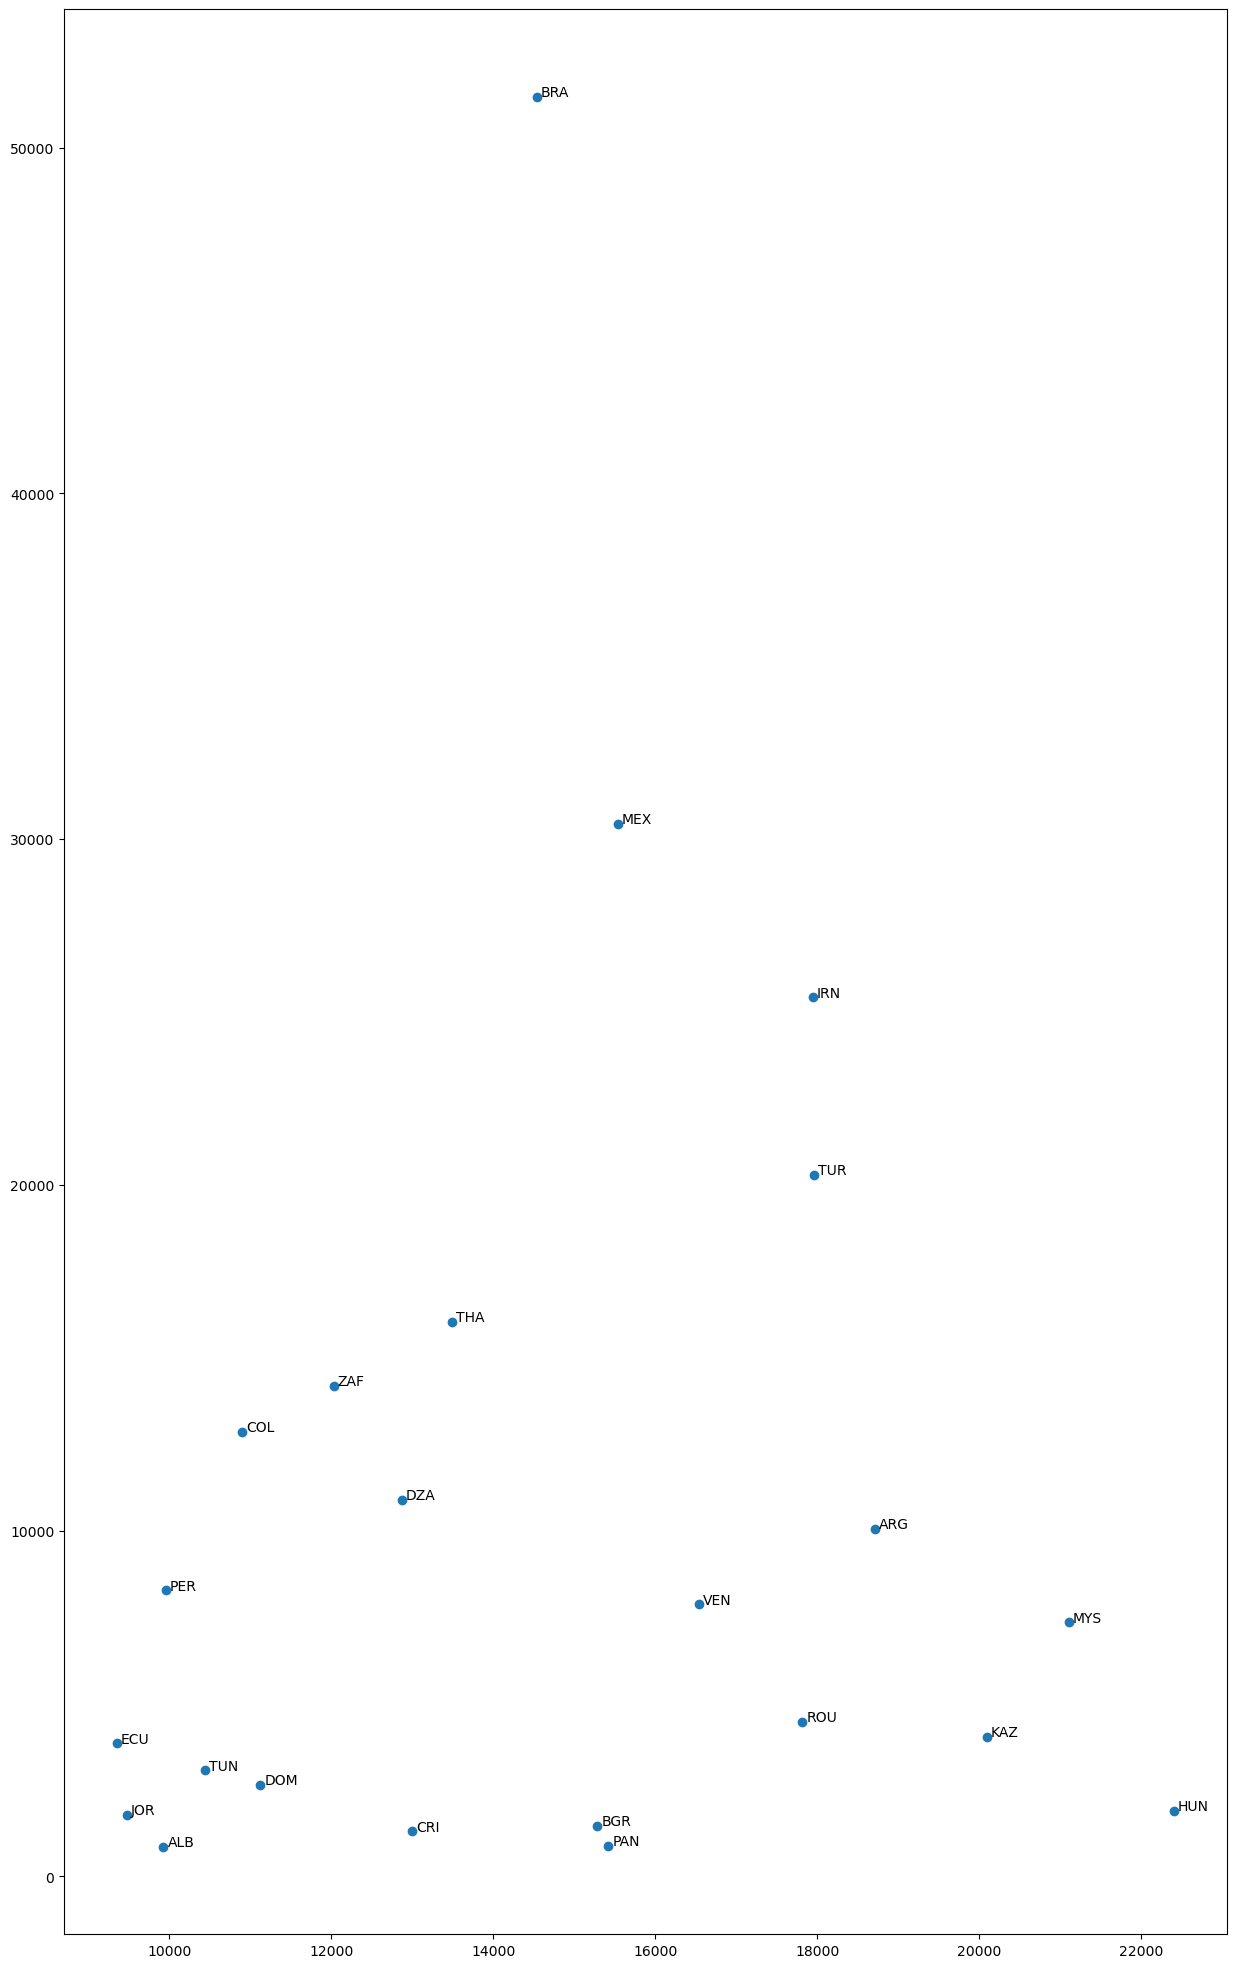

In [52]:
plt.figure(figsize=(15, 25))
plt.scatter(data_merge_umi['2010_x'], data_merge_umi['2010_y']) # , s=60, alpha=0.5, c='red', marker='P')
for i in range(57) :
    x = data_merge_umi.iloc[i, 19]
    y = data_merge_umi.iloc[i, 35]
    note = data_merge_umi.iloc[i, 1]
    plt.annotate(note, (x + 50, y + 10))
plt.grid()                             #\
plt.xlabel("GDP / capita")             # non executé du fait des valeurs nulles
plt.ylabel("15-29 y, in thousands")    #/

Malgré l'erreur signalée, nous observons que les pays les moins favorables pour ce groupe sont ECU, JOR, ALB, TUN, DOM. Essayons de déterminer un indicateur qui aurait des valeurs comparables pour ces pays, et qui nous permettra ensuite de classer les autres, pour ce groupe et les autres groupes. Par exemple simplement le produit de la population en milliers par le GDP en milliers aussi.

In [53]:
data_merge_umi['combi'] = pd.to_numeric(data_merge_umi['2010_x'] * data_merge_umi['2010_y'] / 1000, errors='coerce')

In [54]:
data_merge_umi.iloc[:, [0,1,36]]

,Country Name_x,Country Code,combi
0,Angola,AGO,NaN
1,Jordan,JOR,16814.163779
2,St. Vincent and the Grenadines,VCT,NaN
3,Ecuador,ECU,36006.525312
4,Tunisia,TUN,31945.715101
5,Albania,ALB,8477.760118
6,Peru,PER,82390.506169
7,St. Lucia,LCA,NaN
8,South Africa,ZAF,170762.746727
9,Grenada,GRD,NaN


On a bien ECU, TUN, DOM qui ont des valeurs assez proches, mais JOR et ALB sont nettement en dessous, ce qui correspond au graphe finalement. On peut choisir de mettre la limite à la valeur de 40000, ce qui nous conduit à garder des pays relativement pauvres, mais si la population est importante, comme dans ces pays on a souvent une classe aisée bien au dessus du niveau moyen, cela constitue une clientèle potentielle. Il nous faudra d'autres indicateurs pour affiner notre sélection, mais en 'prenant large' on ne risque pas de louper une belle oportunité.
Nous allons donc écarter JOR, ECU, TUN, ALB, DOM, CRI, BGR, PAN. Concernant les pays "en Nan", nous écartons CUB trop lacunaire en information, mais aussi VCT, LCA, GRD qui sont des iles peu peuplées.
A partir d'une source extérieure pour la donnée de population, estimant que la tranche 15 - 29 ans constitue environ 20 % de la population totale, examinons les cas des derniers pays: L'Angola serait retenue, mais pas les autres (MKD, LBN, SUR, AZE, BLR).

Nous allons continuer l'exploitation de notre indicateur combiné pour les autre groupes de pays dans un nouveau notebook.